In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import datetime as dt
import seaborn as sns

## This sets the plot style
## to have a grid on a white background
sns.set_style("whitegrid")
pd.set_option('max_colwidth',100)
pd.set_option('max_columns',20)

In [2]:
Comments = pd.read_csv("train_test_data.csv")

In [3]:
Comments.head()

,Unnamed: 0,title_len,body_len,time,compound_score,num_early_comments,score
0,l8rf4k,22,0,1080.0,0.0000,28,413085.0
1,l6wu59,38,0,820.0,0.4019,5,315560.0
2,l78uct,29,0,1266.0,0.2732,181,280976.0
3,l846a1,36,0,1264.0,0.2732,259,252031.0
4,l6x130,291,183,829.0,-0.5267,5,222152.0


In [4]:
Comments_copy = Comments.copy()

In [5]:
Comments_train = Comments_copy.sample(frac = .80, random_state = 614)
Comments_test = Comments_copy.drop(Comments_train.index)

In [6]:
Comments_train.head()

,Unnamed: 0,title_len,body_len,time,compound_score,num_early_comments,score
36,lbykxg,80,0,1278.0,0.2732,173,142799.0
57,lzqgxq,73,0,795.0,0.5399,17,119966.0
83,mzfpb3,35,0,221.0,0.0000,8,30853.0
31,lt7v4w,36,0,1267.0,0.2732,169,145294.0
84,na55rn,13,0,1159.0,0.0000,3,30674.0


In [7]:
Comments_train.corr()['score'].sort_values()

body_len             -0.262068
compound_score        0.018781
title_len             0.161111
time                  0.264523
num_early_comments    0.446769
score                 1.000000
Name: score, dtype: float64

In [8]:
## make X
X_train = np.ones([len(Comments_train),6])
X_train[:,1] = np.array(Comments_train.title_len)
X_train[:,2] = np.array(Comments_train.body_len)
X_train[:,3] = np.array(Comments_train.time)
X_train[:,4] = np.array(Comments_train.compound_score)
X_train[:,5] = np.array(Comments_train.num_early_comments)

In [9]:
## Make y
y_train = np.array(Comments_train.score)

## Calculate beta_hat
beta_hat = np.linalg.inv(X_train.transpose().dot(X_train)).dot(X_train.transpose()).dot(y_train)

In [10]:
print("beta_0_hat is",np.round(beta_hat[0],2))
print("beta_1_hat is",np.round(beta_hat[1],2))
print("beta_2_hat is",np.round(beta_hat[2],2))
print("beta_3_hat is",np.round(beta_hat[3],2))
print("beta_4_hat is",np.round(beta_hat[4],2))
print("beta_5_hat is",np.round(beta_hat[5],2))

beta_0_hat is 30430.08
beta_1_hat is 325.73
beta_2_hat is -13.86
beta_3_hat is 25.19
beta_4_hat is 6689.28
beta_5_hat is 600.7


score = (30430.08) + 325.73* title_len + -13.86* body_len + 25.19*time + 6689.28＊compound_score + 600.7＊num_early_comments

In [11]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [12]:
fit = sm.OLS(Comments_train['score'],sm.add_constant(Comments_train[['title_len','body_len','time','compound_score','num_early_comments']])).fit()

print(fit.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.282
Method:                 Least Squares   F-statistic:                     9.787
Date:                Thu, 27 May 2021   Prob (F-statistic):           1.01e-07
Time:                        00:31:52   Log-Likelihood:                -1410.0
No. Observations:                 113   AIC:                             2832.
Df Residuals:                     107   BIC:                             2848.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               3.043e+04   1.81

In [13]:
reg = LinearRegression(copy_X = True)

reg.fit(Comments_train[['title_len','body_len','time','compound_score','num_early_comments']],Comments_train['score'])

LinearRegression()

In [14]:
print("beta_0_hat is",np.round(reg.intercept_,2))
print("beta_1_hat is",np.round(reg.coef_[0],2))
print("beta_2_hat is",np.round(reg.coef_[1],2))
print("beta_3_hat is",np.round(reg.coef_[2],2))
print("beta_4_hat is",np.round(reg.coef_[3],2))
print("beta_5_hat is",np.round(reg.coef_[4],2))

beta_0_hat is 30430.08
beta_1_hat is 325.73
beta_2_hat is -13.86
beta_3_hat is 25.19
beta_4_hat is 6689.28
beta_5_hat is 600.7


score = (30430.08) + 325.73* title_len + -13.86* body_len + 25.19*time + 6689.28＊compound_score + 600.7＊num_early_comments

In [24]:
print("The training MSE is", np.sum(np.power(fit.resid,2))/len(Comments_train))

The training MSE is 4030808097.4594727


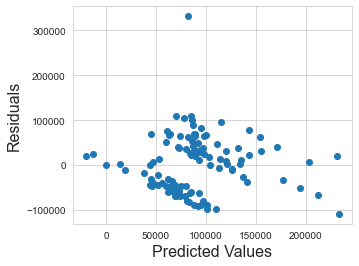

In [17]:
pred = reg.predict(Comments_train[['title_len','body_len','time','compound_score','num_early_comments']])
res = Comments_train['score'] - pred
plt.figure(figsize = (5,4))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

In [18]:
##Polynomial Regression with x1^2
Comments_train['title_len_sq'] = Comments_train['title_len']**2

In [19]:
reg = LinearRegression(copy_X = True)

reg.fit(Comments_train[['title_len','title_len_sq','body_len','time','compound_score','num_early_comments']], Comments_train['score'])

LinearRegression()

In [20]:
print("beta_0_hat is",np.round(reg.intercept_,2))
print("beta_1_hat is",np.round(reg.coef_[0],2))
print("beta_2_hat is",np.round(reg.coef_[1],2))
print("beta_3_hat is",np.round(reg.coef_[2],2))
print("beta_4_hat is",np.round(reg.coef_[3],2))
print("beta_5_hat is",np.round(reg.coef_[4],2))
print("beta_6_hat is",np.round(reg.coef_[5],2))

beta_0_hat is 50197.01
beta_1_hat is -225.75
beta_2_hat is 2.38
beta_3_hat is -13.05
beta_4_hat is 26.6
beta_5_hat is 7988.35
beta_6_hat is 587.45


score = (50197.01) + -225.75* title_len + 2.38 * title_len^2 + -13.05* body_len + 26.6*time + 7988.35＊compound_score + 587.45＊num_early_comments

In [25]:
print("The training MSE is", np.sum(np.power(fit.resid,2))/len(Comments_train))

The training MSE is 4030808097.4594727


In [21]:
# Let's examine the residual plot
pred = reg.predict(Comments_train[['title_len','title_len_sq','body_len','time','compound_score','num_early_comments']])

res = Comments_train['score'] - pred

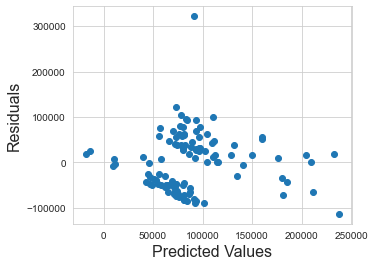

In [22]:
plt.figure(figsize = (5,4))

plt.scatter(pred,res)

plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()

In [23]:
plt.close()

In [27]:
# First add the interaction term
Comments_train['title_body'] = Comments_train['title_len']*Comments_train['body_len']

In [28]:
reg = LinearRegression(copy_X = True)

reg.fit(Comments_train[['title_len','body_len','title_body','time','compound_score','num_early_comments']], Comments_train['score'])

LinearRegression()

In [33]:
print("beta_0_hat is",np.round(reg.intercept_,2))
print("beta_1_hat is",np.round(reg.coef_[0],2))
print("beta_2_hat is",np.round(reg.coef_[1],2))
print("beta_3_hat is",np.round(reg.coef_[2],2))
print("beta_4_hat is",np.round(reg.coef_[3],2))
print("beta_5_hat is",np.round(reg.coef_[4],2))
print("beta_6_hat is",np.round(reg.coef_[5],2))

beta_0_hat is 30147.41
beta_1_hat is 327.88
beta_2_hat is -12.97
beta_3_hat is -0.01
beta_4_hat is 25.33
beta_5_hat is 6619.08
beta_6_hat is 600.57


score = (30147.41) + 327.88* title_len + -12.97* body_len + -0.01* title_len*body_len+ 25.33*time + 6619.08*compound_score + 600.57＊num_early_comments

In [35]:
# Let's re-examine the residual plot
pred = reg.predict(Comments_train[['title_len','body_len','title_body','time','compound_score','num_early_comments']])

res = Comments_train['score'] - pred

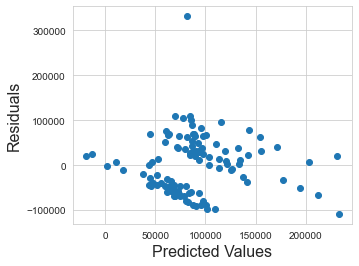

In [36]:
plt.figure(figsize = (5,4))

plt.scatter(pred, res)

plt.xlabel("Predicted Values", fontsize=16)
plt.ylabel("Residuals", fontsize=16)

plt.show()